In [ ]:
import pandas as pd
df = pd.read_csv('drive/My Drive/Data/dataset.csv',header=None)
df.head()

,0,1
0,-10.0,-400.298943
1,-9.9,-390.568974
2,-9.8,-364.284896
3,-9.7,-355.562114
4,-9.6,-337.946480


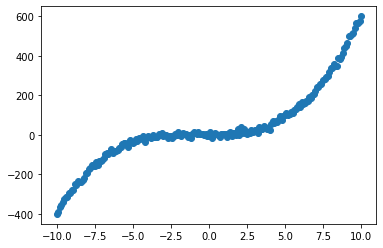

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df[0],df[1])
plt.show()

In [ ]:
x = df[[0]].values
y = df[[1]].values

In [ ]:
import numpy as np
x_pol = np.hstack((x,x**2,x**3))

In [ ]:
from sklearn.linear_model import LinearRegression
pmodel = LinearRegression()

In [ ]:
pmodel.fit(x_pol,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(pmodel.coef_)
print(pmodel.intercept_)

[[0.0515453  1.0367589  0.49913906]]
[1.00146538]


In [ ]:
Yp = pmodel.predict(x_pol)

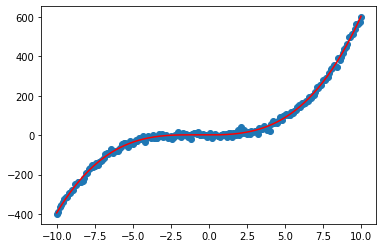

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

plt.plot(x,Yp,c='r')
plt.show()

**Housing Data**

In [81]:
hsd = pd.read_csv('drive/My Drive/Data/houses.csv')

In [82]:
hsd.columns

Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')

In [83]:
hsd = hsd.drop("Unnamed: 0", axis=1)
hsd.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [84]:
hsd['driveway'] = hsd['driveway'].str.replace('yes','1')
hsd['driveway'] = hsd['driveway'].str.replace('no','0')
hsd['recroom'] = hsd['recroom'].str.replace('yes','1')
hsd['recroom'] = hsd['recroom'].str.replace('no','0')
hsd['fullbase'] = hsd['fullbase'].str.replace('yes','1')
hsd['fullbase'] = hsd['fullbase'].str.replace('no','0')
hsd['gashw'] = hsd['gashw'].str.replace('yes','1')
hsd['gashw'] = hsd['gashw'].str.replace('no','0')
hsd['airco'] = hsd['airco'].str.replace('yes','1')
hsd['airco'] = hsd['airco'].str.replace('no','0')
hsd['prefarea'] = hsd['prefarea'].str.replace('yes','1')
hsd['prefarea'] = hsd['prefarea'].str.replace('no','0')

In [85]:
hsd['driveway'] = hsd['driveway'].astype(int)
hsd['recroom'] = hsd['recroom'].astype(int)
hsd['fullbase'] = hsd['fullbase'].astype(int)
hsd['gashw'] = hsd['gashw'].astype(int)
hsd['airco'] = hsd['airco'].astype(int)
hsd['prefarea'] = hsd['prefarea'].astype(int)

In [86]:
hsd.corr().sort_values(['price'],ascending=False)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
airco,0.453347,0.221765,0.160412,0.184955,0.296216,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,-0.173860,0.018261,0.296216,0.043412,0.042940
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
prefarea,0.329074,0.234782,0.078953,0.064013,0.042940,0.199378,0.161292,0.228651,-0.059170,0.115626,0.092364,1.000000
driveway,0.297167,0.288778,-0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
recroom,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292


In [87]:
hsd.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [88]:
X = hsd[['lotsize','bathrms','stories','airco','garagepl','bedrooms','prefarea']].values

In [89]:
Y = hsd[['price']].values

In [90]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

**Linear Regression**

In [91]:
from sklearn.linear_model import LinearRegression
lmodel1 = LinearRegression()

lmodel1.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
ytrain_p = lmodel1.predict(xtrain)
ytest_p = lmodel1.predict(xtest)

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(ytrain_p,ytrain))
print(mean_absolute_error(ytest_p,ytest))

print('*********************************************************')

print(mean_squared_error(ytrain_p,ytrain))
print(mean_squared_error(ytest_p,ytest))

12364.741259452427
10953.011674795503
*********************************************************
274145401.3718068
210614126.17595622


**Polynomial Regression**

In [94]:
X

array([[5850,    1,    2, ...,    1,    3,    0],
       [4000,    1,    1, ...,    0,    2,    0],
       [3060,    1,    1, ...,    0,    3,    0],
       ...,
       [6000,    2,    4, ...,    1,    3,    0],
       [6000,    2,    2, ...,    1,    3,    0],
       [6000,    1,    2, ...,    1,    3,    0]])

In [95]:
a = np.arange(10).reshape(5,2)
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [96]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3)

In [97]:
pol.fit(a)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [98]:
pol.transform(a)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,  36.,  42.,  49., 216., 252., 294., 343.],
       [  1.,   8.,   9.,  64.,  72.,  81., 512., 576., 648., 729.]])

In [99]:
X

array([[5850,    1,    2, ...,    1,    3,    0],
       [4000,    1,    1, ...,    0,    2,    0],
       [3060,    1,    1, ...,    0,    3,    0],
       ...,
       [6000,    2,    4, ...,    1,    3,    0],
       [6000,    2,    2, ...,    1,    3,    0],
       [6000,    1,    2, ...,    1,    3,    0]])

In [100]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [101]:
scl.fit(X)
x_scl = scl.transform(X)

In [102]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)
pol.fit(x_scl)
x_pol = pol.transform(x_scl)

In [103]:
x_pol

array([[ 1.        ,  0.32302806, -0.5694948 , ...,  0.00223114,
        -0.02613845,  0.3062201 ],
       [ 1.        , -0.53101296, -0.5694948 , ...,  1.71648506,
         0.72499808,  0.3062201 ],
       [ 1.        , -0.96495812, -0.5694948 , ...,  0.00223114,
        -0.02613845,  0.3062201 ],
       ...,
       [ 1.        ,  0.39227462,  1.42373699, ...,  0.00223114,
        -0.02613845,  0.3062201 ],
       [ 1.        ,  0.39227462,  1.42373699, ...,  0.00223114,
        -0.02613845,  0.3062201 ],
       [ 1.        ,  0.39227462, -0.5694948 , ...,  0.00223114,
        -0.02613845,  0.3062201 ]])

In [104]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pol,Y)

In [105]:
from sklearn.linear_model import LinearRegression
lmodel2 = LinearRegression()

lmodel2.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
ytrain_p = lmodel2.predict(xtrain)
ytest_p = lmodel2.predict(xtest)

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(ytrain_p,ytrain))
print(mean_absolute_error(ytest_p,ytest))

print('*********************************************************')

print(mean_squared_error(ytrain_p,ytrain))
print(mean_squared_error(ytest_p,ytest))

10871.624694376527
12596.930656934306
*********************************************************
217389624.39180928
305046215.28649634
